In [88]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import seaborn as sns

#### 1- load the pandas data frame songs of the audio features (minimum 500 songs as diverse as possible))

In [89]:
import os

directory = '/Users/ciaranmacdermott/Documents/GitHub/'
listy=[]   

for i,file in enumerate(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        listy.append(os.path.join(directory, filename))
    else:
        continue

In [90]:
listy

['/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excerciseswork_df.csv',
 '/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesdnb_df.csv',
 '/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesclassic_df.csv',
 '/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excerciseseighty_df.csv',
 '/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excerciseswestcoast_df.csv',
 '/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesdf_scale.csv',
 '/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesweek6project.csv',
 '/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesrockabill_df.csv',
 '/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesfunkydf.csv',
 '/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesnyhouse_df.csv',
 '/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesmetal_df.csv',
 '/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_exce

In [91]:
file1 = pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisessuperfinaldf.csv',sep='\t')
file2 = pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesrappopdf.csv',sep='\t')
file3= pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesreggaedfcsv',sep='\t')
file4=pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesoldskwldfcsv',sep='\t')
file4= pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesfunkydf.csv',sep='\t')
file5=pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesrockabill_df.csv',sep='\t')
file5=pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excerciseswestcoast_df.csv',sep='\t')
file6=pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesturkfunk_df.csv',sep='\t')
file7=pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesnyhouse_df.csv',sep='\t')
file8=pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisessoulblue_df.csv',sep='\t')
file9=pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesmetal_df.csv',sep='\t')
file10=pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesdnb_df.csv',sep='\t')
file11=pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excerciseswork_df.csv',sep='\t')



                   

In [92]:
df = pd.DataFrame(file1)
df2= pd.DataFrame(file2)
df3 = pd.DataFrame(file3)
df4 = pd.DataFrame(file4)
df5 = pd.DataFrame(file5)
df6 = pd.DataFrame(file6)
df7 = pd.DataFrame(file7)
df8 = pd.DataFrame(file8)
df9 = pd.DataFrame(file9)
df10=pd.DataFrame(file10)
df11=pd.DataFrame(file11)


In [93]:
df=pd.concat([df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11],axis=0)
df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,Artist,Song,artist
0,0.662,0.693,3,-4.298,0.0698,0.13400,0.000000,0.1450,0.655,86.009,7ByfFjT83MNmisdzhZ50Fv,252120,4,Chris Brown,With You,NaN
1,0.869,0.887,0,-4.505,0.0993,0.06050,0.000000,0.1480,0.784,129.221,1H5tvpoApNDxvxDexoaAUo,198400,4,Baha Men,Who Let The Dogs Out,NaN
2,0.502,0.639,1,-8.322,0.0442,0.02920,0.000000,0.2110,0.350,89.988,6xcjGCRaSGl7wSpxAdCp0j,250684,4,August Twelfth,Home by Midnight,NaN
3,0.883,0.664,4,-10.395,0.4110,0.22500,0.000002,0.9410,0.800,118.104,0nyrltZrQGAJMBZc1bYvuQ,250200,4,James Brown,Get Up Offa That Thing,NaN
4,0.644,0.599,9,-7.941,0.0291,0.04450,0.000000,0.2860,0.948,111.829,1eRqy8jW4ZLMJR6dl3xsgI,193893,4,The Cardigans,Lovefool - Radio Edit,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.556,0.868,9,-5.741,0.0441,0.00157,0.000000,0.5120,0.433,164.075,2mumY7rLurSxmnWIC1PCtc,224213,4,NaN,NaN,Tech N9ne Collabos
102,0.537,0.898,7,-1.819,0.1340,0.00490,0.000000,0.1500,0.575,102.513,4ofZe3eFWlNKC0FYEFOSvG,198365,4,NaN,NaN,Live My Last
103,0.852,0.921,6,-5.164,0.0419,0.15900,0.000000,0.0546,0.630,110.005,1rfgs4royNOYxw269vuTTT,186541,4,NaN,NaN,Prophit
104,0.536,0.721,10,-6.440,0.3860,0.06200,0.000000,0.8240,0.393,117.139,61QSuw5VlC0LTS8WMO356g,191942,5,NaN,NaN,Fat Joe


#### 2-  standardise the data using standardscaler

In [94]:
num_df=df.select_dtypes(['number'])
num_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.662,0.693,3,-4.298,0.0698,0.13400,0.000000,0.1450,0.655,86.009,252120,4
1,0.869,0.887,0,-4.505,0.0993,0.06050,0.000000,0.1480,0.784,129.221,198400,4
2,0.502,0.639,1,-8.322,0.0442,0.02920,0.000000,0.2110,0.350,89.988,250684,4
3,0.883,0.664,4,-10.395,0.4110,0.22500,0.000002,0.9410,0.800,118.104,250200,4
4,0.644,0.599,9,-7.941,0.0291,0.04450,0.000000,0.2860,0.948,111.829,193893,4
...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.556,0.868,9,-5.741,0.0441,0.00157,0.000000,0.5120,0.433,164.075,224213,4
102,0.537,0.898,7,-1.819,0.1340,0.00490,0.000000,0.1500,0.575,102.513,198365,4
103,0.852,0.921,6,-5.164,0.0419,0.15900,0.000000,0.0546,0.630,110.005,186541,4
104,0.536,0.721,10,-6.440,0.3860,0.06200,0.000000,0.8240,0.393,117.139,191942,5


In [95]:
num_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000
mean,0.605995,0.707372,5.329747,-6.387026,0.087099,0.162572,0.078669,0.183214,0.502024,125.612643,232743.885251,3.963517
std,0.157804,0.197704,3.606169,3.031545,0.082583,0.229671,0.218182,0.143122,0.247335,30.864273,60425.276108,0.268249
min,0.105000,0.005820,0.000000,-37.626000,0.022800,0.000001,0.000000,0.015700,0.027700,38.455000,53796.000000,1.000000
25%,0.498000,0.575000,2.000000,-7.775000,0.037200,0.005590,0.000000,0.093300,0.304250,100.023000,195806.750000,4.000000
50%,0.610500,0.735000,5.000000,-5.773500,0.054400,0.053000,0.000006,0.126000,0.495000,123.994000,222366.500000,4.000000
75%,0.723000,0.869000,9.000000,-4.406250,0.097375,0.225000,0.002250,0.235000,0.699000,146.046750,257726.500000,4.000000
max,0.980000,0.999000,11.000000,1.621000,0.721000,0.994000,0.960000,0.974000,0.981000,207.951000,939139.000000,5.000000


In [96]:
num_df.drop_duplicates()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.662,0.693,3,-4.298,0.0698,0.13400,0.000000,0.1450,0.655,86.009,252120,4
1,0.869,0.887,0,-4.505,0.0993,0.06050,0.000000,0.1480,0.784,129.221,198400,4
2,0.502,0.639,1,-8.322,0.0442,0.02920,0.000000,0.2110,0.350,89.988,250684,4
3,0.883,0.664,4,-10.395,0.4110,0.22500,0.000002,0.9410,0.800,118.104,250200,4
4,0.644,0.599,9,-7.941,0.0291,0.04450,0.000000,0.2860,0.948,111.829,193893,4
...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.603,0.783,9,-6.891,0.1380,0.00353,0.000000,0.2160,0.182,87.154,180333,4
101,0.556,0.868,9,-5.741,0.0441,0.00157,0.000000,0.5120,0.433,164.075,224213,4
102,0.537,0.898,7,-1.819,0.1340,0.00490,0.000000,0.1500,0.575,102.513,198365,4
103,0.852,0.921,6,-5.164,0.0419,0.15900,0.000000,0.0546,0.630,110.005,186541,4


<AxesSubplot:>

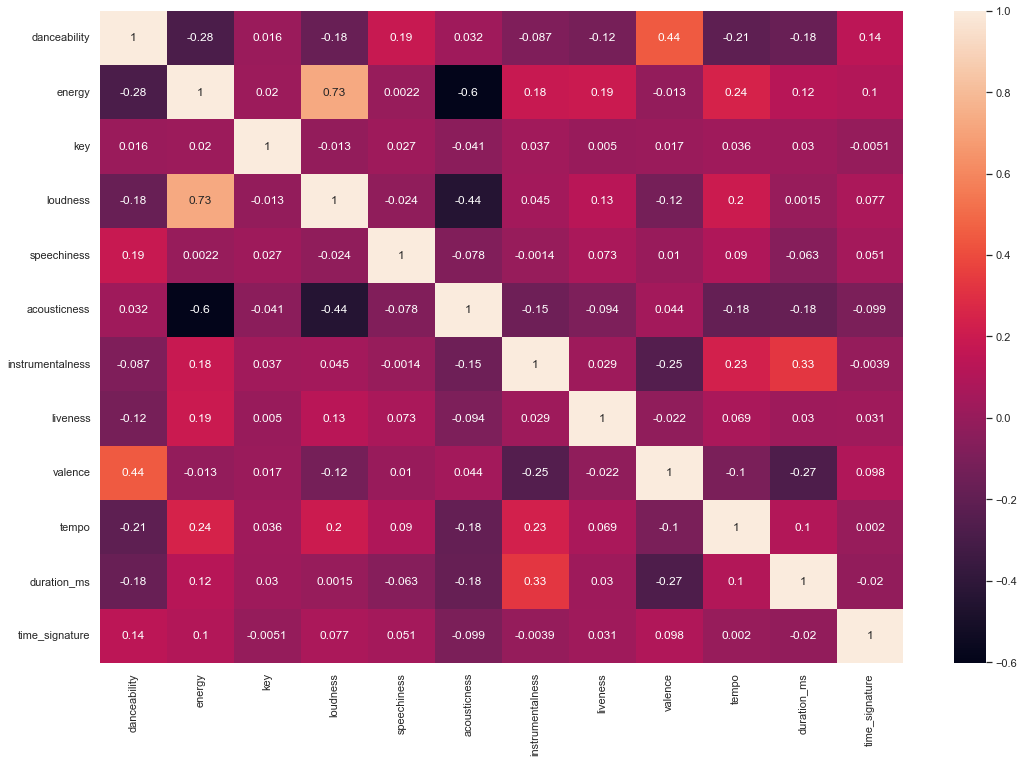

In [97]:
###Going to drop some features which may not be impactful on our model
sns.set(rc={'figure.figsize':(18,12)})
sns.heatmap(df.corr(),annot=True)

In [98]:
df['time_signature'].unique()

array([4, 3, 1, 5])

In [99]:
###There is not a huge amount of correlation between our variables here except perhaps with loudness and energy
## I will drop loudness and duration_ms as I feel they will not have a great impact on song reccomendations...

num_df=num_df.drop(['duration_ms','loudness','time_signature'], axis=1)
num_df

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.662,0.693,3,0.0698,0.13400,0.000000,0.1450,0.655,86.009
1,0.869,0.887,0,0.0993,0.06050,0.000000,0.1480,0.784,129.221
2,0.502,0.639,1,0.0442,0.02920,0.000000,0.2110,0.350,89.988
3,0.883,0.664,4,0.4110,0.22500,0.000002,0.9410,0.800,118.104
4,0.644,0.599,9,0.0291,0.04450,0.000000,0.2860,0.948,111.829
...,...,...,...,...,...,...,...,...,...
101,0.556,0.868,9,0.0441,0.00157,0.000000,0.5120,0.433,164.075
102,0.537,0.898,7,0.1340,0.00490,0.000000,0.1500,0.575,102.513
103,0.852,0.921,6,0.0419,0.15900,0.000000,0.0546,0.630,110.005
104,0.536,0.721,10,0.3860,0.06200,0.000000,0.8240,0.393,117.139


In [100]:
std_scaler=StandardScaler().fit(num_df)

In [101]:
num_df_scaled=std_scaler.transform(num_df)
num_df_scaled

array([[ 0.35492725, -0.07269819, -0.6460953 , ..., -0.26702601,
         0.61854515, -1.28325493],
       [ 1.6667809 ,  0.90864157, -1.47806785, ..., -0.24606317,
         1.14014588,  0.11691959],
       [-0.65906591, -0.34585463, -1.20074367, ...,  0.19415655,
        -0.6146969 , -1.15432559],
       ...,
       [ 1.55904413,  1.08062896,  0.18587725, ..., -0.89870637,
         0.51745973, -0.50572582],
       [-0.44359237,  0.06893847,  1.29517398, ...,  4.47756426,
        -0.44082999, -0.27456677],
       [-1.00128861,  0.59501752, -0.36877112, ..., -0.52556775,
        -1.11608056,  0.60130376]])

In [102]:
df_scale=pd.DataFrame(num_df_scaled,columns=["danceability","energy","key","speechiness","acousticness",
                                    "instrumentalness","liveness","valence","tempo"])
df_scale


,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.354927,-0.072698,-0.646095,-0.209487,-0.124415,-0.360594,-0.267026,0.618545,-1.283255
1,1.666781,0.908642,-1.478068,0.147759,-0.444464,-0.360594,-0.246063,1.140146,0.116920
2,-0.659066,-0.345855,-1.200744,-0.519505,-0.580756,-0.360594,0.194157,-0.614697,-1.154326
3,1.755505,-0.219393,-0.368771,3.922460,0.271835,-0.360583,5.295115,1.204841,-0.243298
4,0.240853,-0.548193,1.017850,-0.702366,-0.514134,-0.360594,0.718228,1.803266,-0.446624
...,...,...,...,...,...,...,...,...,...
6409,-0.316843,0.812531,1.017850,-0.520716,-0.701069,-0.360594,2.297429,-0.279093,1.246274
6410,-0.437255,0.964285,0.463201,0.567978,-0.686568,-0.360594,-0.232088,0.295072,-0.748485
6411,1.559044,1.080629,0.185877,-0.547358,-0.015555,-0.360594,-0.898706,0.517460,-0.505726
6412,-0.443592,0.068938,1.295174,3.619709,-0.437932,-0.360594,4.477564,-0.440830,-0.274567


In [103]:
#songid= list(df.id)
#df_scale["identity"]=songid
#we will use this to input the id back into our df for the model

In [104]:
### Sillhouette test shows 11 clusters being pretty good

kmeans = KMeans(n_clusters=11, random_state=42)
kmeans.fit(df_scale)
kmeans

KMeans(n_clusters=11, random_state=42)

In [105]:
labels=kmeans.labels_
labels

array([9, 9, 8, ..., 7, 1, 6], dtype=int32)

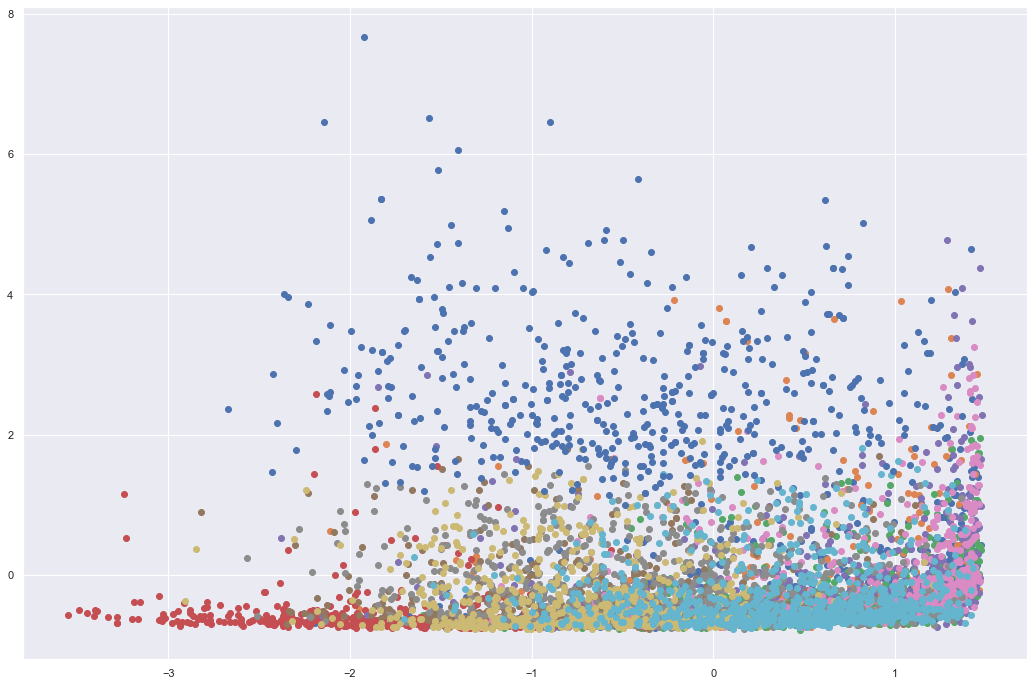

In [106]:
# assign a cluster to each example

# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df_scale.to_numpy()[row_ix, 1], df_scale.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()


In [107]:
clusters = kmeans.predict(df_scale)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     638
1     273
2     723
3     406
4     494
5     427
6     576
7     853
8     682
9     879
10    463
dtype: int64

In [108]:
#clus_df = pd.DataFrame(X)
df_scale["cluster"] = clusters
df_scale

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.354927,-0.072698,-0.646095,-0.209487,-0.124415,-0.360594,-0.267026,0.618545,-1.283255,9
1,1.666781,0.908642,-1.478068,0.147759,-0.444464,-0.360594,-0.246063,1.140146,0.116920,9
2,-0.659066,-0.345855,-1.200744,-0.519505,-0.580756,-0.360594,0.194157,-0.614697,-1.154326,8
3,1.755505,-0.219393,-0.368771,3.922460,0.271835,-0.360583,5.295115,1.204841,-0.243298,1
4,0.240853,-0.548193,1.017850,-0.702366,-0.514134,-0.360594,0.718228,1.803266,-0.446624,7
...,...,...,...,...,...,...,...,...,...,...
6409,-0.316843,0.812531,1.017850,-0.520716,-0.701069,-0.360594,2.297429,-0.279093,1.246274,1
6410,-0.437255,0.964285,0.463201,0.567978,-0.686568,-0.360594,-0.232088,0.295072,-0.748485,2
6411,1.559044,1.080629,0.185877,-0.547358,-0.015555,-0.360594,-0.898706,0.517460,-0.505726,7
6412,-0.443592,0.068938,1.295174,3.619709,-0.437932,-0.360594,4.477564,-0.440830,-0.274567,1


In [75]:
kmeans.inertia_

26137.955431676

### Not a great result!  We can use the 'elbow' test to see a more optimal number of clusters

Training a K-Means model with 1 clusters! 

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

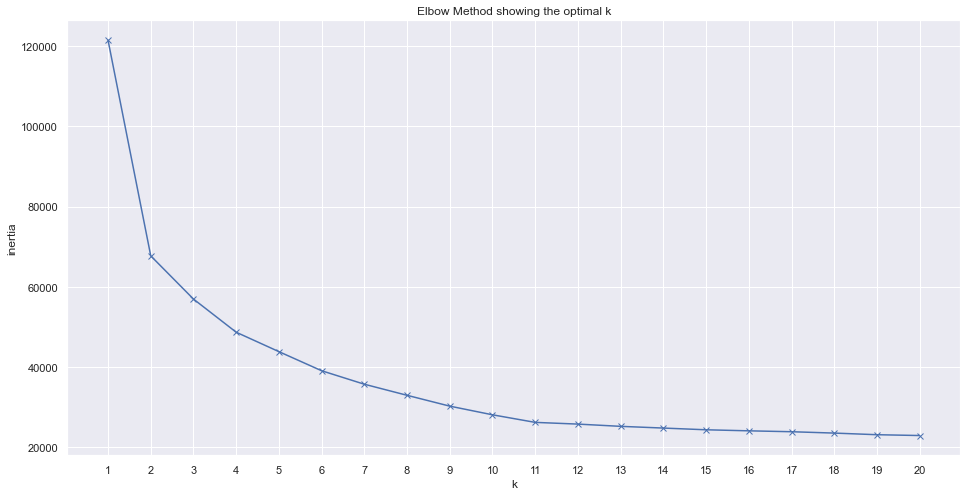

In [76]:
K = range(1, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scale)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

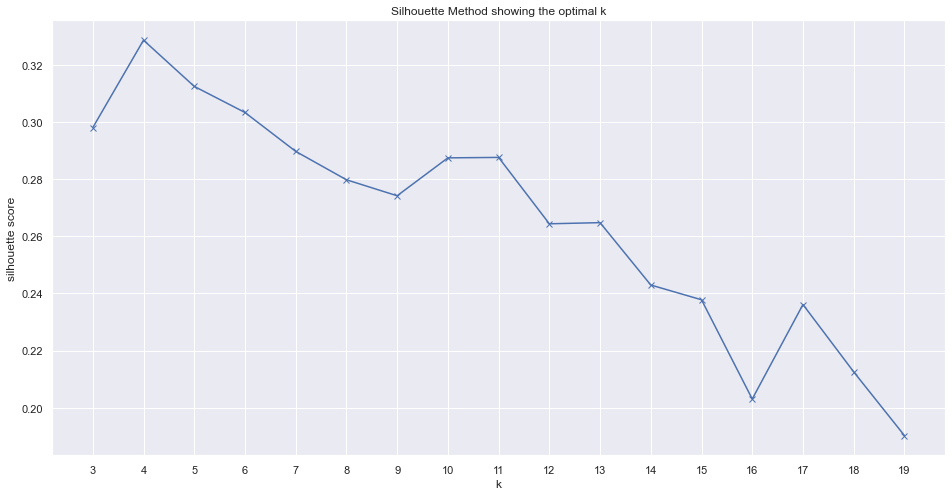

In [77]:
K = range(3, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scale)
    
    #filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(df_scale, kmeans.predict(df_scale)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [78]:
song_id = df['id']
song_id

0      7ByfFjT83MNmisdzhZ50Fv
1      1H5tvpoApNDxvxDexoaAUo
2      6xcjGCRaSGl7wSpxAdCp0j
3      0nyrltZrQGAJMBZc1bYvuQ
4      1eRqy8jW4ZLMJR6dl3xsgI
                ...          
101    2mumY7rLurSxmnWIC1PCtc
102    4ofZe3eFWlNKC0FYEFOSvG
103    1rfgs4royNOYxw269vuTTT
104    61QSuw5VlC0LTS8WMO356g
105    4xDwCYhobDehSBGUmd5H6Y
Name: id, Length: 6414, dtype: object

In [79]:
df.drop_duplicates()
df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,Artist,Song,artist
0,0.662,0.693,3,-4.298,0.0698,0.13400,0.000000,0.1450,0.655,86.009,7ByfFjT83MNmisdzhZ50Fv,252120,4,Chris Brown,With You,NaN
1,0.869,0.887,0,-4.505,0.0993,0.06050,0.000000,0.1480,0.784,129.221,1H5tvpoApNDxvxDexoaAUo,198400,4,Baha Men,Who Let The Dogs Out,NaN
2,0.502,0.639,1,-8.322,0.0442,0.02920,0.000000,0.2110,0.350,89.988,6xcjGCRaSGl7wSpxAdCp0j,250684,4,August Twelfth,Home by Midnight,NaN
3,0.883,0.664,4,-10.395,0.4110,0.22500,0.000002,0.9410,0.800,118.104,0nyrltZrQGAJMBZc1bYvuQ,250200,4,James Brown,Get Up Offa That Thing,NaN
4,0.644,0.599,9,-7.941,0.0291,0.04450,0.000000,0.2860,0.948,111.829,1eRqy8jW4ZLMJR6dl3xsgI,193893,4,The Cardigans,Lovefool - Radio Edit,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.556,0.868,9,-5.741,0.0441,0.00157,0.000000,0.5120,0.433,164.075,2mumY7rLurSxmnWIC1PCtc,224213,4,NaN,NaN,Tech N9ne Collabos
102,0.537,0.898,7,-1.819,0.1340,0.00490,0.000000,0.1500,0.575,102.513,4ofZe3eFWlNKC0FYEFOSvG,198365,4,NaN,NaN,Live My Last
103,0.852,0.921,6,-5.164,0.0419,0.15900,0.000000,0.0546,0.630,110.005,1rfgs4royNOYxw269vuTTT,186541,4,NaN,NaN,Prophit
104,0.536,0.721,10,-6.440,0.3860,0.06200,0.000000,0.8240,0.393,117.139,61QSuw5VlC0LTS8WMO356g,191942,5,NaN,NaN,Fat Joe


In [80]:

df_scale['song_identity']=list(df['id'])
df_scale

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,song_identity
0,0.354927,-0.072698,-0.646095,-0.209487,-0.124415,-0.360594,-0.267026,0.618545,-1.283255,9,7ByfFjT83MNmisdzhZ50Fv
1,1.666781,0.908642,-1.478068,0.147759,-0.444464,-0.360594,-0.246063,1.140146,0.116920,9,1H5tvpoApNDxvxDexoaAUo
2,-0.659066,-0.345855,-1.200744,-0.519505,-0.580756,-0.360594,0.194157,-0.614697,-1.154326,8,6xcjGCRaSGl7wSpxAdCp0j
3,1.755505,-0.219393,-0.368771,3.922460,0.271835,-0.360583,5.295115,1.204841,-0.243298,1,0nyrltZrQGAJMBZc1bYvuQ
4,0.240853,-0.548193,1.017850,-0.702366,-0.514134,-0.360594,0.718228,1.803266,-0.446624,7,1eRqy8jW4ZLMJR6dl3xsgI
...,...,...,...,...,...,...,...,...,...,...,...
6409,-0.316843,0.812531,1.017850,-0.520716,-0.701069,-0.360594,2.297429,-0.279093,1.246274,1,2mumY7rLurSxmnWIC1PCtc
6410,-0.437255,0.964285,0.463201,0.567978,-0.686568,-0.360594,-0.232088,0.295072,-0.748485,2,4ofZe3eFWlNKC0FYEFOSvG
6411,1.559044,1.080629,0.185877,-0.547358,-0.015555,-0.360594,-0.898706,0.517460,-0.505726,7,1rfgs4royNOYxw269vuTTT
6412,-0.443592,0.068938,1.295174,3.619709,-0.437932,-0.360594,4.477564,-0.440830,-0.274567,1,61QSuw5VlC0LTS8WMO356g


In [111]:
with open("kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)
    

In [110]:
kmeans


KMeans(n_clusters=11, random_state=42)

In [82]:
with open("std_scaler.pickle", "wb") as f:
    pickle.dump(std_scaler,f)
    

In [83]:
df_scale.to_csv(r'/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercisesdf_scale.csv', sep='\t',index=False)
